All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

Agradecimentos especiais ao [Leonardo Uieda](www.leouieda.com)

Esse documento que você está usando é um [Jupyter notebook](http://jupyter.org/). É um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (números, texto, figuras, videos, etc).

# Interpolação, mapas e a gravidade da Terra

## Objetivos

* Entender a influência da interpolação na geração de mapas de dados geofísicos
* Visualizar as variações geográficas da gravidade da Terra
* Entender como a escala de cores utilizada nos mapas influencia nossa interpretação
* Aprender quais são os fatores que devem ser considerados quando visualizamos um dado em mapa

## Instruções

O notebook te fornecerá exemplos interativos que trabalham os temas abordados no questionário. Utilize esses exemplos para responder as perguntas.

As células com números ao lado, como `In [1]:`, são código [Python](http://python.org/). Algumas dessas células não produzem resultado e servem de preparação para os exemplos interativos. Outras, produzem gráficos interativos. **Você deve executar todas as células, uma de cada vez**, mesmo as que não produzem gráficos.

Para executar uma célula, clique em cima dela e aperte `Shift + Enter`. O foco (contorno verde ou cinza em torno da célula) deverá passar para a célula abaixo. Para rodá-la, aperte `Shift + Enter` novamente e assim por diante. Você pode executar células de texto que não acontecerá nada.

## Preparação

Exectute as células abaixo para carregar as componentes necessárias para nossa prática. Vamos utilizar várias *bibliotecas*, inclusive uma de geofísica chamada [Fatiando a Terra](http://www.fatiando.org).

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import ipywidgets as widgets
from IPython.display import display
import seaborn
from fatiando import utils, gridder
import fatiando
from icgem import load_icgem_gdf, down_sample

## Interpolação

O melhor jeito de entendermos o efeito da interpolação é fabricando alguns dados fictícios (sintéticos).
Assim, podemos gerar os dados tanto em pontos aleatórios quanto em um grid regular.
Isso nos permite comparar os resultados da interpolação com o *verdadeiro*. Nosso verdadeiro será um conjunto de dados medidos em um grid regular. Como se tivéssemos ido ao campo e medido em um grid regular.

Rode a célula abaixo para gerar os dados em pontos aleatórios e em um grid regular.

In [2]:
area = (-5000., 5000., -5000., 5000.)
shape = (100, 100)
xp, yp = gridder.scatter(area, 100, seed=6)
x, y = [i.reshape(shape) for i in gridder.regular(area, shape)]
aletatorio = 50*utils.gaussian2d(xp, yp, 10000, 1000, angle=45)
regular = 50*utils.gaussian2d(x, y, 10000, 1000, angle=45).reshape(shape)

Rode as duas células abaixo para gerar um gráfico interativo. Nesse gráfico você poderá controlar:

* O número de pontos (em x e y) do grid utilizado na interpolação (`num_pontos`)
* O método de interpolação utilizado (`metodo`). Pode ser interpolação cúbica ou linear.
* Mostrar ou não os pontos de medição aleatórios no mapa interpolado.

**Repare no que acontece com as bordas do mapa e onde não há observações**.

In [3]:
def interpolacao(num_pontos, metodo, pontos_medidos):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    ishape = (num_pontos, num_pontos)
    tmp = gridder.interp(yp, xp, aletatorio, ishape, area=area, algorithm=metodo, extrapolate=True)
    yi, xi, interp = [i.reshape(ishape) for i in tmp]
    ranges = np.abs([interp.min(), interp.max()]).max()
    kwargs = dict(cmap="RdBu_r", vmin=-ranges, vmax=ranges)
    ax = axes[0]
    ax.set_title(u'Pontos medidos')
    ax.set_aspect('equal')
    tmp = ax.scatter(yp*0.001, xp*0.001, s=80, c=aletatorio, **kwargs)
    plt.colorbar(tmp, ax=ax, aspect=50, pad=0.01)
    ax.set_xlabel('y (km)')
    ax.set_ylabel('x (km)')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    plt.tight_layout(pad=0)
    ax = axes[1]
    ax.set_title(u'Interpolado')
    ax.set_aspect('equal')
    tmp = ax.contourf(yi*0.001, xi*0.001, interp, 40, **kwargs)
    plt.colorbar(tmp, ax=ax, aspect=50, pad=0.01)
    if pontos_medidos:
        ax.plot(yp*0.001, xp*0.001, '.k')
    ax.set_xlabel('y (km)')
    ax.set_ylabel('x (km)')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    plt.tight_layout(pad=0)

In [4]:
w = widgets.interactive(interpolacao, num_pontos=(5, 100, 5), metodo=['cubic', 'linear'], pontos_medidos=False)
display(w)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01MCwgZGVzY3JpcHRpb249dSdudW1fcG9udG9zJywgbWluPTUsIHN0ZXA9NSksIERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnbWXigKY=


Vamos verificar se alguma das combinações chegou perto do resultado *verdadeiro*.

Rode a célula abaixo para gerar um gráfico dos dados verdadeiros (gerados em um grid regular). Esse deveria ser o resultado observado se a interpolação fosse perfeita.

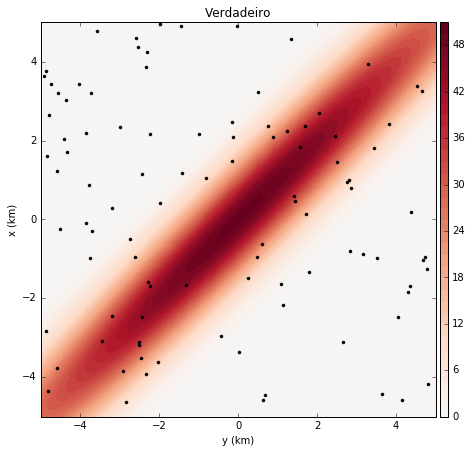

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ranges = np.abs([regular.min(), regular.max()]).max()
kwargs = dict(cmap="RdBu_r", vmin=-ranges, vmax=ranges)
ax.set_title(u'Verdadeiro')
ax.set_aspect('equal')
tmp = ax.contourf(y*0.001, x*0.001, regular, 40, **kwargs)
plt.colorbar(tmp, ax=ax, aspect=50, pad=0.01)
ax.plot(yp*0.001, xp*0.001, '.k')
ax.set_xlabel('y (km)')
ax.set_ylabel('x (km)')
plt.tight_layout(pad=0)

# Gravidade do mundo

Vamos visualizar como a gravidade da Terra varia geograficamente. Os dados da gravidade do mundo foram baixados de http://icgem.gfz-potsdam.de/ICGEM/potato/Service.html usando o modelo EIGEN-6c3stat.

**As medições foram feitas em cima da superfície da Terra**, ou seja, acompanhando a topografia.

Rode as células abaixo para carregar os dados.

In [6]:
dados = load_icgem_gdf('data/eigen-6c3stat-0_5-mundo.gdf')

In [7]:
lat, lon, grav = dados['latitude'], dados['longitude'], dados['gravity_earth']

Vamos fazer um mapa da gravidade utilizando a [projeção Mollweid](http://en.wikipedia.org/wiki/Map_projection). Esses dados estão em mGal: 1 mGal = 10⁻⁵ m/s². 

Rode as duas células abaixo para gerar o gráfico (isso pode demorar um pouco).

In [8]:
bm = Basemap(projection='moll', lon_0=0, resolution='c')
x, y = bm(lon, lat)

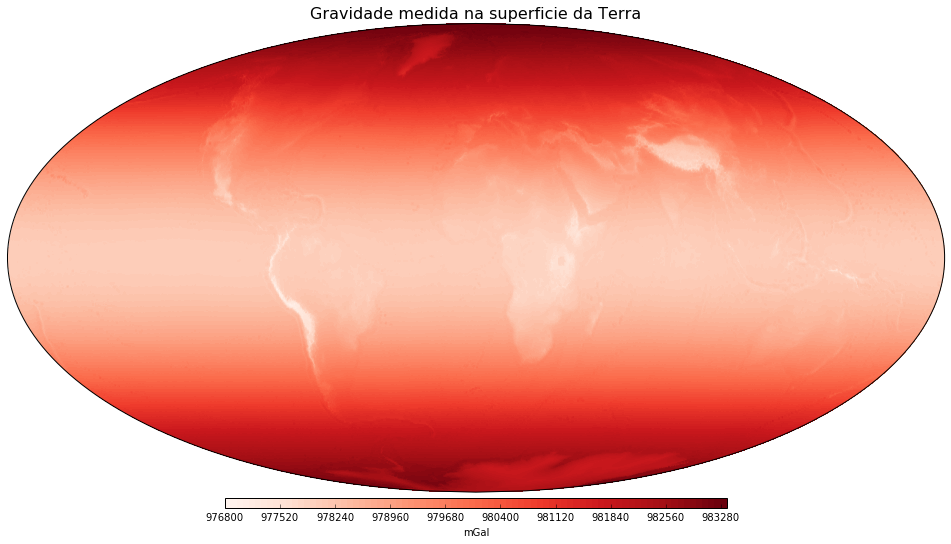

In [9]:
plt.figure(figsize=(18, 10))
tmp = bm.contourf(x, y, grav, 100, tri=True, cmap='Reds')
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, shrink=0.5).set_label('mGal')
plt.title("Gravidade medida na superficie da Terra", fontsize=16)

## Escala de cor

A escala de cores que utilizamos para mapear os valores pode ter um impacto grande na nossa interpretação dos resultados. Abaixo, veremos como o nosso dado de gravidade mundial fica quando utilizamos diferentes escalas de cor.

As escalas podem ser divididas em 3 categorias:

* lineares: as cores variam de um tom claro (geralmente branco) a uma cor (por exemplo, vermelho) de maneira linear
* divergente: as cores variam de uma cor escura, passando por um tom claro (geralmente branco), e depois para outra cor escura.
* raindow ou qualitativos: as cores variam sem um padrão de intensidade claro. Podem ser as cores do arco-íris ou outra combinação.

Nas escalas lineares e divergentes, as cores sempre variam de baixa intensidade para alta intensidade (e vice-versa para escalas divergentes).

Rode as células abaixo para gerar um mapa interativo da gravidade mundial. Você poderá controlar qual escala de cor você quer usar. Experimente com elas e veja como elas afetam sua percepção.

**Para pensar**: Como isso pode afetar alguem que é [daltônico](https://pt.wikipedia.org/wiki/Daltonismo)?

In [10]:
def grav_mundial(escala_de_cor):
    plt.figure(figsize=(18, 10))
    tmp = bm.contourf(x, y, grav, 100, tri=True, cmap=escala_de_cor)
    plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, shrink=0.5).set_label('mGal')
    plt.title("Escala de cor: {}".format(escala_de_cor), fontsize=16)  

In [11]:
escalas = 'Reds Blues Greys YlOrBr RdBu BrBG PRGn Dark2 jet ocean rainbow gnuplot'.split()
w = widgets.interactive(grav_mundial, escala_de_cor=escalas)
display(w)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnZXNjYWxhX2RlX2NvcicsIG9wdGlvbnM9KCdSZWRzJywgJ0JsdWVzJywgJ0dyZXlzJywgJ1lsT3JCcicsICdSZELigKY=


# A Terra Normal e o distúrbio da gravidade

## Objetivos

* Aprender a calcular a gravidade da Terra Normal e o distúrbio da gravidade
* Gerar mapas do distúrbio para o mundo todo
* Entender a relação entre o distúrbio e a isostasia
* Observar o estado de equilíbrio isostático em diferentes regiões do planeta

## A Terra Normal

"Terra Normal" é o nome que damos ao elipsóide de referência utilizado para o cálculo de anomalias da gravidade. Um elipsóide geralmente utilizado é o [WGS84](http://en.wikipedia.org/wiki/World_Geodetic_System). 

Existem fórmulas para calcular a gravidade (lembre-se que gravidade = gravitação + centrífuga) de um elipsóide em qualquer ponto fora dele. Porém, essas fórmulas são mais complicadas do que queremos para essa aula. Uma alternativa é utilizar a fórmula de  Somigliana:

$$
\gamma(\varphi) = \frac{a \gamma_a \cos^2 \varphi + b \gamma_b \sin^2 \varphi}{\sqrt{a^2 \cos^2 \varphi + b^2 \sin^2 \varphi}}
$$

$\gamma$ é a gravidade do elipsóide calculada na latitude $\varphi$ e **sobre a superfície do elipsóide** (ou seja, altitude zero).
$a$ e $b$ são os eixos maior e menor do elipsóide, $\gamma_a$ e $\gamma_b$ são a gravidade do elipsóide no equador e nos polos. Os valores de $a$, $b$, $\gamma_a$ e $\gamma_b$ são tabelados para cada elipsóide. Os valores abaixo são referentes ao WGS84:

<table>
<tr> <th> a </th> <td> 6378137 </td> <td> metros </td> </tr>
<tr> <th> b </th> <td> 6356752.3142 </td> <td> metros </td> </tr>
<tr> <th> $\gamma_a$ </th> <td> 9.7803253359 </td> <td> m/s² </td> </tr>
<tr> <th> $\gamma_b$ </th> <td> 9.8321849378 </td> <td> m/s² </td> </tr>
</table>

Os valores foram retirados do livro:

> Hofmann-Wellenhof, B., and H. Moritz (2006), Physical Geodesy, 2nd, corr. ed. 2006 edition., Springer, Wien ; New York.

### Carregando os dados e fazendo um mapa

Depois de calcular os valores acima, precisamos carregá-los aqui no notebook para gerarmos os mapas.

Primeiro, coloque o nome do seu arquivo `.csv` abaixo e execute a célula.

In [12]:
arquivo_dados = 'data/somigliana.csv'

Agora, execute as células abaixo para carregar os dados e gerar um mapa com os valores que você calculou.

In [13]:
lon, lat, gamma = np.loadtxt(arquivo_dados, delimiter=',', unpack=True, skiprows=0, usecols=[0, 1, -1])

In [14]:
bm = Basemap(projection='moll', lon_0=0, resolution='c')
x, y = bm(lon, lat)

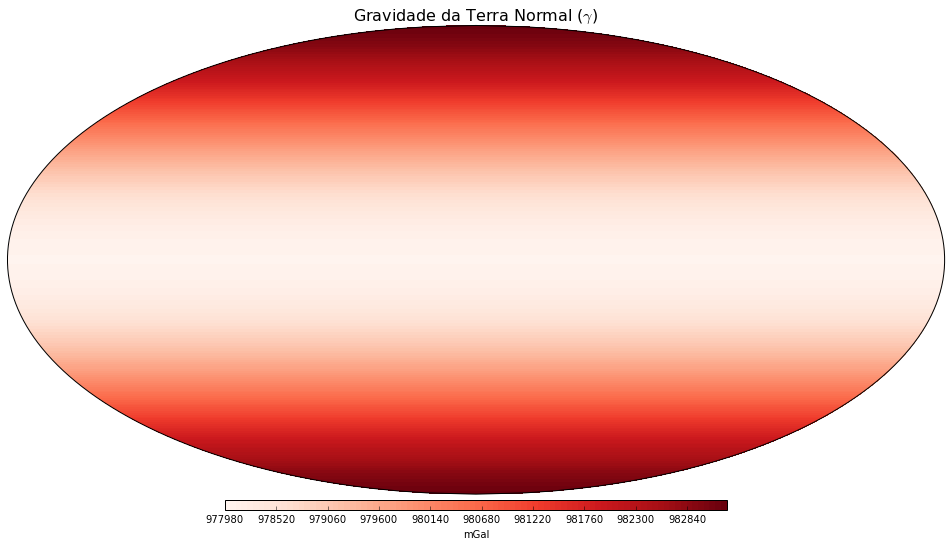

In [15]:
plt.figure(figsize=(18, 10))
tmp = bm.contourf(x, y, gamma, 100, tri=True, cmap='Reds')
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, shrink=0.5).set_label('mGal')
plt.title(r"Gravidade da Terra Normal ($\gamma$)", fontsize=16)

### Cáculo da Terra Normal no ponto de observação ($\gamma_P$)

A fórmula de Somgliana nos dá a gravidade da Terra Normal calculada sobre o elipsóide. Nós precisamos de $\gamma$ calculado no ponto onde medimos a gravidade (P) para calcular o distúrbio. Para obter $\gamma_P$, nós podemos utilizar a **correção de ar-livre**. Essa correção nos dá uma approximação de $\gamma_P$:

$$ \gamma_P \approx \gamma - 0.3086 H $$

em que $H$ é a altitude em relação ao elipsóide (altitude geométrica) em **metros**. Lembrando que a correção é feita em **mGal**.

Rode as células abaixo para carregar os dados de $\gamma_P$ e gerar um mapa.

In [16]:
arquivo_dados = 'data/freeair.csv'

In [17]:
gamma_p = np.loadtxt(arquivo_dados, delimiter=',', unpack=True, skiprows=0, usecols=[-1])

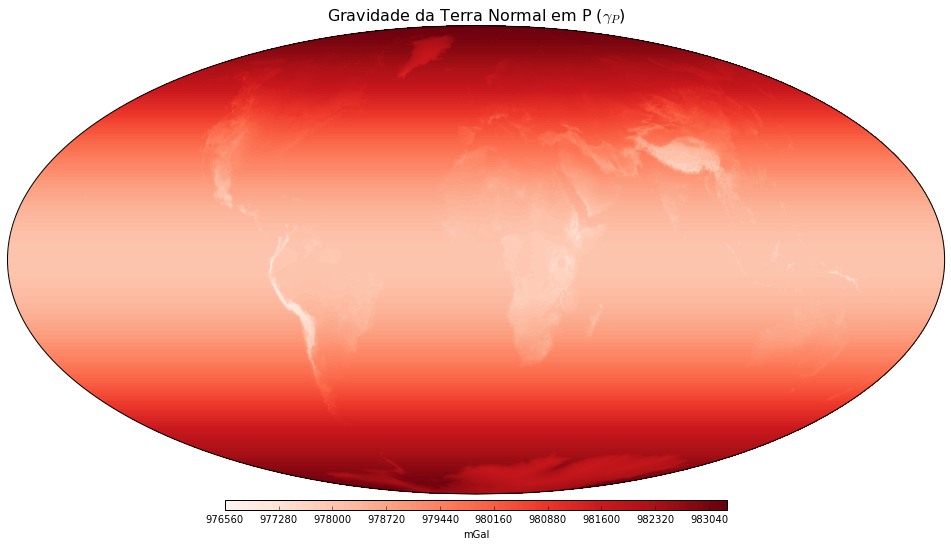

In [18]:
plt.figure(figsize=(18, 10))
tmp = bm.contourf(x, y, gamma_p, 100, tri=True, cmap='Reds')
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, shrink=0.5).set_label('mGal')
plt.title(r"Gravidade da Terra Normal em P ($\gamma_P$)", fontsize=16)

## Distúrbio da gravidade

O distúrbio da gravidade é definido como:

$$ \delta = g_P - \gamma_P$$

em que $g_P$ é a gravidade medida no ponto P.

Rode as células abaixo para carregar os valores calculados e gerar o mapa.

In [19]:
arquivo_dados = 'data/residual.csv'

In [20]:
disturbio = np.loadtxt(arquivo_dados, delimiter=',', unpack=True, skiprows=0, usecols=[-1])

In [21]:
def varia_escala(escala_de_cor):
    plt.figure(figsize=(18, 10))
    ranges = np.abs([disturbio.min(), disturbio.max()]).max()
    tmp = bm.contourf(x, y, disturbio, 100, tri=True, cmap=escala_de_cor, vmin=-ranges, vmax=ranges)
    plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, shrink=0.5).set_label('mGal')
    plt.title(u"Distúrbio da gravidade (escala de cor '{}')".format(escala_de_cor), fontsize=16)

In [22]:
escalas = 'Reds Blues Greys YlOrBr RdBu_r BrBG PRGn Dark2 jet ocean rainbow gnuplot'.split()
w = widgets.interactive(varia_escala, escala_de_cor=escalas)
display(w)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnZXNjYWxhX2RlX2NvcicsIG9wdGlvbnM9KCdSZWRzJywgJ0JsdWVzJywgJ0dyZXlzJywgJ1lsT3JCcicsICdSZELigKY=


# Isostasia e anomalia Bouguer

## Objetivos

* Visualizar os mecanismos de compensação isostática de Airy e Pratt
* Cacular e visualizar a anomalia Bouguer para o mundo todo

## Anomalia Bouguer

Na prática passada, vocês calcularam o distúrbio da gravidade ($\delta$) removendo a gravidade da Terra Normal calculada no ponto de observação ($\gamma_P$). Vimos que o distúrbio nos indica o estado de equilíbrio isostático da região: se $\delta$ for pequeno e positivo a região encontra-se em equilíbro, caso contrário não está. A falta de equilíbrio isostático sugere que existem forças externas erguendo ou abaixando a topografia.

Se quisermos ver o efeito gravitacional de coisas abaixo da topografia (Moho, bacias sedimentares e outras heterogeneidades), precisamos **remover o efeito gravitacional da topografia** do distúrbio. Para isso, precisamos calcular a atração gravitacional da massa topográfica (vamos chamar isso de $g_t$). A **anomalia Bouguer** é o distúrbio da gravidade menos o efeito da topografia:

$$\Delta g_{bg} = \delta - g_t$$

Um jeito simples de calcular $g_t$ é através de uma aproximação. Nesse caso, vamos aproximar toda a massa topográfica em baixo do ponto onde medimos a gravidade (P) por um platô infinito (o *platô de Bouguer*). Se a topografia abaixo do ponto P tem $H$ metros de **altitude em relação ao elipsóide**, podemos aproximar $g_t$ por:

$$g_t \approx 2 \pi G \rho H$$

em que $\rho$ é a densidade da topografia e $G$ é a contante gravitacional.

Nos oceanos, não temos topografia acima do elipsóide. Porém, temos uma camada de água que não foi removida devidamente com a Terra Normal ($\gamma_P$). Podemos utilizar a aproximação do platô de Bouguer para calcular o efeito gravitacional da camada de água e removê-la do distúrbio. Assim, teremos a anomalia Bouguer para regiões continentais e oceânicas.

### Calculando a anomalia Bouguer

Para fazer os cálculos, vamos precisar o valor da altitude topográfica. Nos continentes, essa altitude é a mesma da altitude na qual os dados foram medidos. Já nos oceanos, a altitude de medição é zero (superfície da água). O que precisamos realmente é da batimetria nos oceanos. Por sorte, existem modelos digitais de terreno, como o [ETOPO1](http://www.ngdc.noaa.gov/mgg/global/global.html) que nos dão topografia nos continentes e batimetria nos oceanos. O arquivo `data/etopo1-0_5-mundo.gdf` contem os dados de topografia do ETOPO1 calculado nos mesmo pontos em que a gravidade foi medida. 

**Dicas** para calcular o efeito gravitacional da topografia utilizando o platô de Bouguer.

* Utilize a densidade $\rho_c = 2670\ kg/m^3$ para a topografia. 
* Nos oceanos, utilize a densidade $\rho_c$ para a crosta do elipsóide e $\rho_a = 1040\ kg/m^3$ para a água do mar.
* Utilize o valor de $G = 0.00000000006673\ m^3 kg^{-1} s^{-1}$
* O valor calculado estará em m/s². Converta para mGal = 100000 m/s²

### Carregando os dados e fazendo um mapa

Depois de calcular os valores acima, precisamos carregá-los aqui no notebook para gerarmos os mapas.

Primeiro, coloque o nome do seu arquivo `.csv` abaixo e execute a célula. **O nome deve ser exato**. Dica: apague o nome do arquivo e aperte Tab.

In [23]:
arquivo_dados = 'data/bouguer.csv'

Agora, execute as células abaixo para carregar os dados e gerar um mapa com os valores que você calculou.

In [24]:
lon, lat, bouguer = np.loadtxt(arquivo_dados, delimiter=',', unpack=True, skiprows=0, usecols=[0, 1, -1])

In [25]:
bm = Basemap(projection='moll', lon_0=0, resolution='c')
x, y = bm(lon, lat)

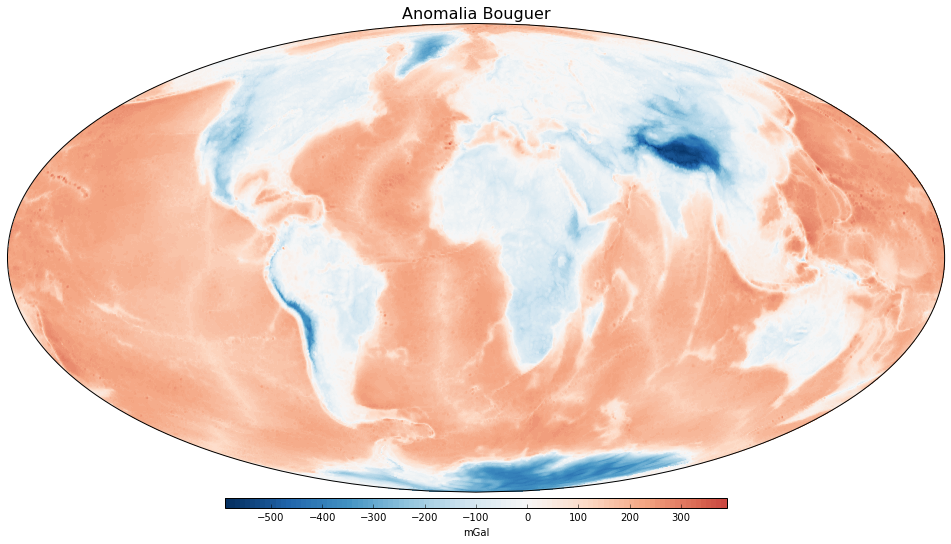

In [26]:
plt.figure(figsize=(18, 10))
ranges = np.abs([bouguer.min(), bouguer.max()]).max()
tmp = bm.contourf(x, y, bouguer, 100, tri=True, cmap='RdBu_r', vmin=-ranges, vmax=ranges)
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, shrink=0.5).set_label('mGal')
plt.title(r"Anomalia Bouguer", fontsize=16)

# Inversão de dados de uma bacia sedimentar 2D poligonal

## Objetivos

* Entender melhor como funciona a inversão de dados

A célula abaixo _prepara_ o ambiente

In [27]:
from fatiando.inversion import Smoothness1D
from fatiando.gravmag.basin2d import PolygonalBasinGravity
from fatiando.gravmag import talwani
from fatiando.mesher import Polygon
from fatiando.vis import mpl
from fatiando import utils
import numpy as np

C:\ProgramData\Anaconda2\lib\site-packages\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


A célula abaixo cria dados sintéticos para testar a inversão de dados. O resultado será um polígono.

In [32]:
noise = 5

In [33]:
# Make some synthetic data to test the inversion
# The model will be a polygon.
# Reverse x because vertices must be clockwise.
xs = np.linspace(0, 100000, 100)[::-1]
depths = (-1e-15*(xs - 50000)**4 + 8000 -
          3000*np.exp(-(xs - 70000)**2/(10000**2)))
depths -= depths.min()  # Reduce depths to zero
props = {'density': -300}
model = Polygon(np.transpose([xs, depths]), props)
x = np.linspace(0, 100000, 100)
z = -100*np.ones_like(x)
data = utils.contaminate(talwani.gz(x, z, [model]), noise, seed=0)

A célula abaixo executa a inversão, dada as condições iniciais descritas em `initial`

In [34]:
# Make the solver using smoothness regularization and run the inversion
misfit = PolygonalBasinGravity(x, z, data, 50, props, top=0)
regul = Smoothness1D(misfit.nparams)
solver = misfit + 1e-4*regul
# This is a non-linear problem so we need to pick an initial estimate
initial = 3000*np.ones(misfit.nparams)
solver.config('levmarq', initial=initial).fit()

A célula abaixo cria a imagem da bacia e mostra o ajuste dos dados

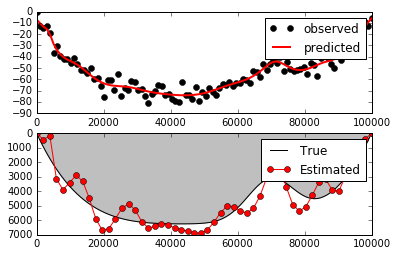

In [35]:
%matplotlib inline
mpl.figure()
mpl.subplot(2, 1, 1)
mpl.plot(x, data, 'ok', label='observed')
mpl.plot(x, solver[0].predicted(), '-r', linewidth=2, label='predicted')
mpl.legend()
ax = mpl.subplot(2, 1, 2)
mpl.polygon(model, fill='gray', alpha=0.5, label='True')
# The estimate_ property of our solver gives us the estimate basin as a polygon
# So we can directly pass it to plotting and forward modeling functions
mpl.polygon(solver.estimate_, style='o-r', label='Estimated')
ax.invert_yaxis()
mpl.legend()
mpl.show()